##Mall Customer Segmentation Data##
Using K-Means 

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Mall_Customers.csv")

In [11]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [37]:
df.shape
print(f'Nº columns: {df.shape[1]}') 
print(f'Nº rows: {df.shape[0]}') 

Nº columns: 5
Nº rows: 200


In [38]:
# No missing or null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Female    112
Male       88
Name: Gender, dtype: int64

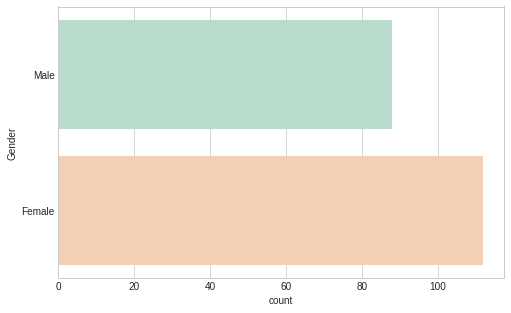

In [39]:
# Plot countplot by gender
plt.style.use("seaborn-whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(y="Gender", data=df, palette="Pastel2");
df["Gender"].value_counts()

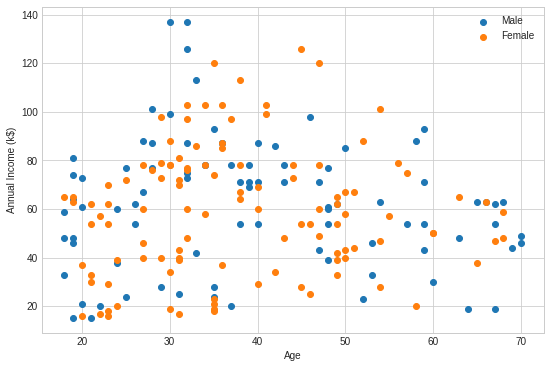

In [51]:
# Plot scatter plot Age x Spending Score (1-100) by Gender
plt.figure(figsize=(9, 6))
for gender in ['Male' , 'Female']:
  plt.scatter(x="Age", y="Annual Income (k$)", data = df[df['Gender'] == gender], label = gender)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.legend();

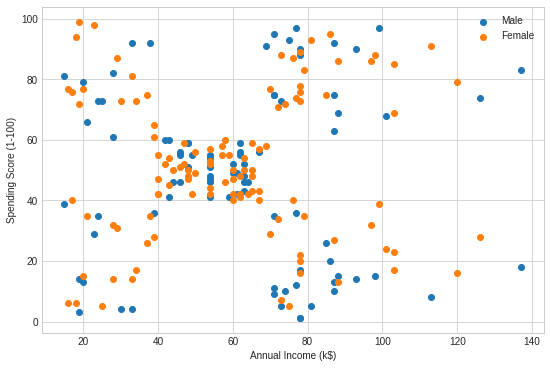

In [78]:
# Plot scatter plot Annual Income (k$) x Spending Score (1-100) by Gender
plt.figure(figsize=(9, 6))
for gender in ["Male", "Female"]:
  plt.scatter(x="Annual Income (k$)", y="Spending Score (1-100)", data = df[df['Gender'] == gender], label = gender)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend();

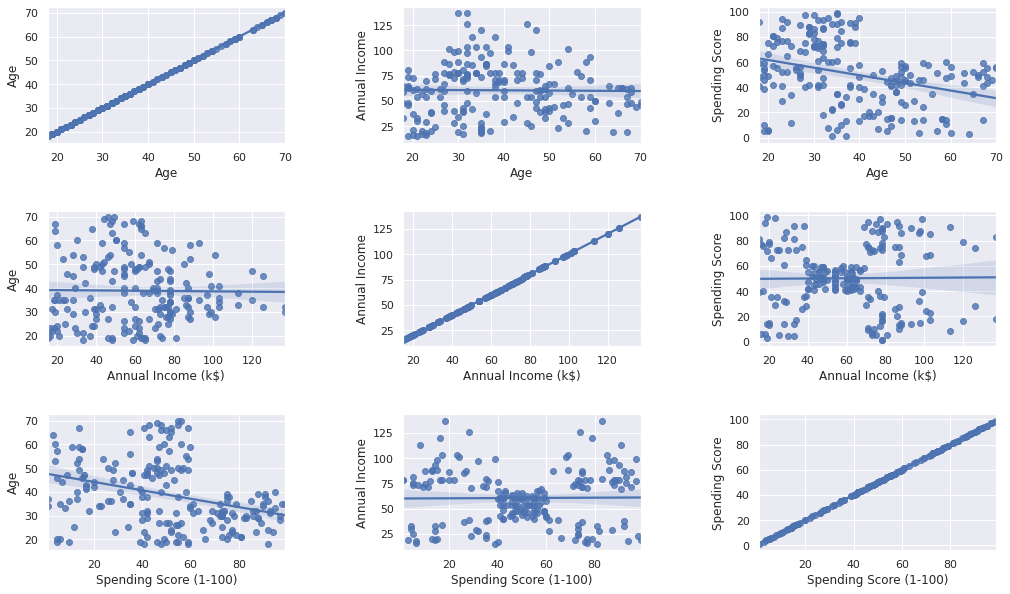

In [281]:
# Plot the relation between Age , Annual Income and Spending Score
plt.figure(1 , figsize = (17 , 10))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    for y in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
        n += 1
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [136]:
# KMeans: setting initially with 6 clusters (at random): Age x Spending Score
km = KMeans(n_clusters=6)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [135]:
y_predicted = km.fit_predict(df[["Age", "Spending Score (1-100)"]])
y_predicted[:10]

array([4, 1, 2, 1, 4, 1, 2, 1, 3, 1], dtype=int32)

In [139]:
df["cluster"] = y_predicted

In [140]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,1
2,3,Female,20,16,6,2
3,4,Female,23,16,77,1
4,5,Female,31,17,40,4


In [162]:
colors = list(df["cluster"])

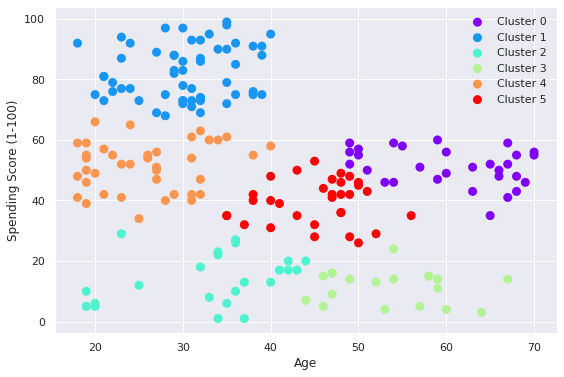

In [196]:
plt.figure(figsize = (9, 6))
size=81
cmap = plt.cm.rainbow
norm = plt.Normalize(df['cluster'].values.min(), df['cluster'].values.max())

for i, dff in df.groupby("cluster"):
    plt.scatter(dff["Age"], dff["Spending Score (1-100)"], s=size, c=cmap(norm(dff['cluster'])), 
                edgecolors='none', label="Cluster {:g}".format(i))
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)");
plt.legend()
plt.show()

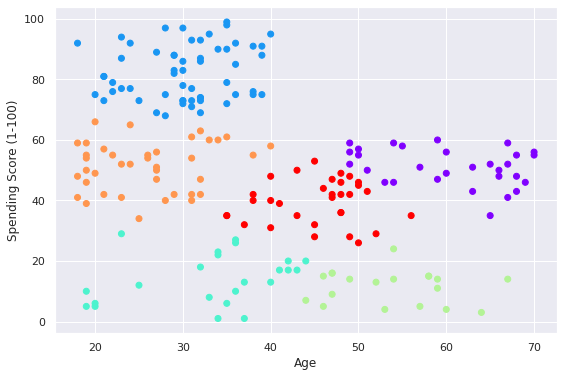

In [193]:
plt.figure(1 , figsize = (9, 6))
plt.scatter(df["Age"], df["Spending Score (1-100)"], c=colors, cmap="rainbow");
sns.set(font_scale=1)
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)");


In [237]:
# Elbow plot method
x = df[['Age', 'Spending Score (1-100)']]
sse = []
for k in range(1 , 11):
    kms = KMeans(n_clusters = k)
    kms.fit(x)
    sse.append(kms.inertia_)

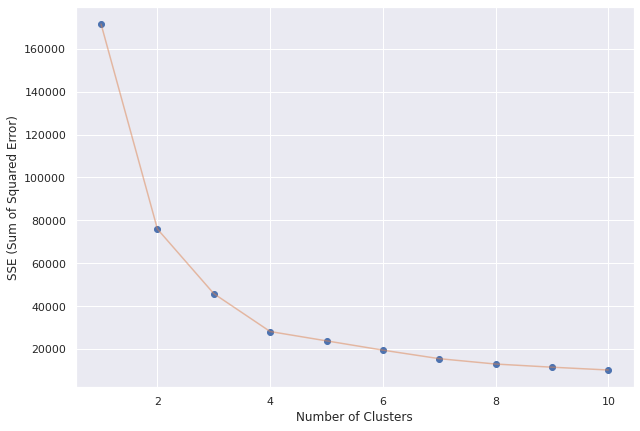

In [239]:
# The plot clearly show K (ideal number of cluster) should be 4 (K=4)
plt.figure(figsize = (10 ,7))
plt.plot(np.arange(1 , 11) , sse, 'o')
plt.plot(np.arange(1 , 11) , sse, '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('SSE (Sum of Squared Error)')
plt.show()

In [202]:
k_rng = range(1, 11)
sse = []
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[["Age", 'Spending Score (1-100)']])
  sse.append(km.inertia_)

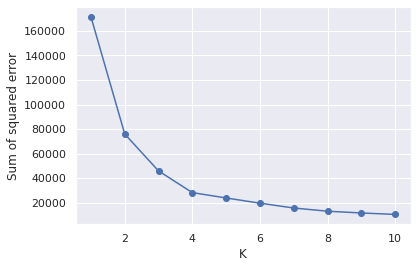

In [205]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_rng, sse, marker='o');

In [240]:
# Let's redo with 4 ideal clusters
km2 = KMeans(n_clusters=4)
km2

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [246]:
y_predicted_2 = km2.fit_predict(df[["Age", "Spending Score (1-100)"]])
y_pred2 = np.unique(y_predicted_2)
y_pred2

array([0, 1, 2, 3], dtype=int32)

In [248]:
df["cluster"] = y_predicted_2

In [249]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,1
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3


In [250]:
colors = list(df["cluster"])

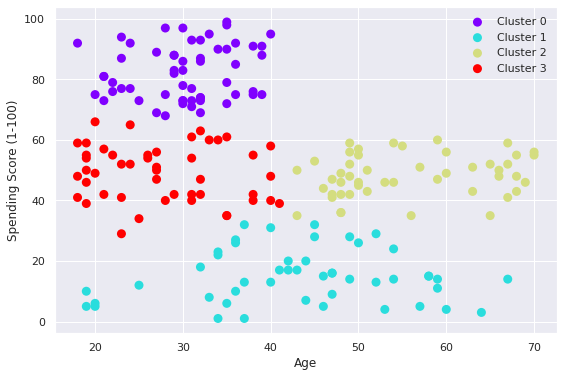

In [254]:
plt.figure(figsize = (9, 6))
size=81
cmap = plt.cm.rainbow
norm = plt.Normalize(df['cluster'].values.min(), df['cluster'].values.max())

for i, dff in df.groupby("cluster"):
    plt.scatter(dff["Age"], dff["Spending Score (1-100)"], s=size, c=cmap(norm(dff['cluster'])), 
                edgecolors='none', label="Cluster {:g}".format(i))
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)");
plt.legend()
plt.show()

In [261]:
# Let's plot with the centroids
km2.cluster_centers_

array([[30.1754386 , 82.35087719],
       [43.29166667, 15.02083333],
       [55.70833333, 48.22916667],
       [27.61702128, 49.14893617]])

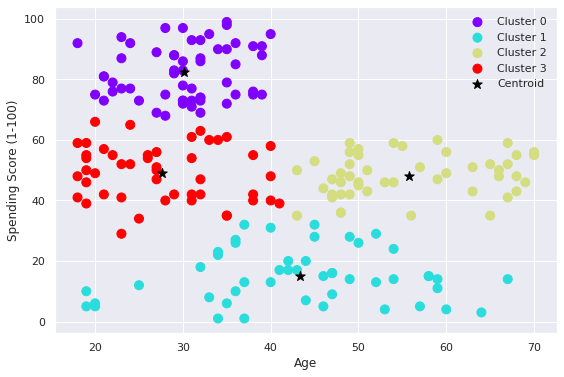

In [284]:
# That's the final plot with K=4 and its centroids for the first cluster
#Age x Spending Score
plt.figure(figsize=(9, 6))
size = 81
cmap = plt.cm.rainbow
norm = plt.Normalize(df["cluster"].values.min(), df["cluster"].values.max())

for i, dff in df.groupby("cluster"):
  plt.scatter(dff["Age"], dff["Spending Score (1-100)"], s=size, c=cmap(norm(dff['cluster'])),
              edgecolors=None, label="Cluster {:g}".format(i))
plt.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], s=99, c="black", marker="*", label="Centroid")  
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)");
plt.legend()
plt.show()

In [317]:
# Now it's gonna be Annual Income x Spending Score 
# Elbow plot method
x2 = df[["Annual Income (k$)", "Spending Score (1-100)"]]
sse_2 = []
for k in range(1 , 11):
    kms2 = KMeans(n_clusters = k)
    kms2.fit(x2)
    sse_2.append(kms2.inertia_)

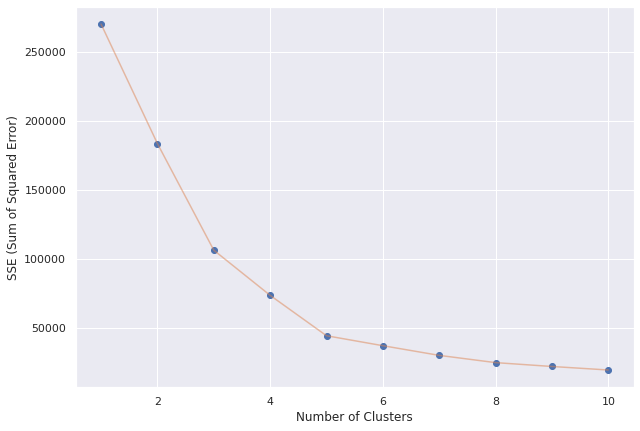

In [314]:
plt.figure(figsize = (10 ,7))
plt.plot(np.arange(1 , 11) , sse_2, 'o')
plt.plot(np.arange(1 , 11) , sse_2, '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('SSE (Sum of Squared Error)')
plt.show()

In [292]:
km_final = KMeans(n_clusters=5)
km_final

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [293]:
y_pred_final = km_final.fit_predict(df[["Annual Income (k$)", "Spending Score (1-100)"]])

In [295]:
df["cluster2"] = y_pred_final

In [296]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,cluster2
0,1,Male,19,15,39,3,4
1,2,Male,21,15,81,0,0
2,3,Female,20,16,6,1,4
3,4,Female,23,16,77,0,0
4,5,Female,31,17,40,3,4


In [304]:
km_final.cluster_centers_

array([[25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

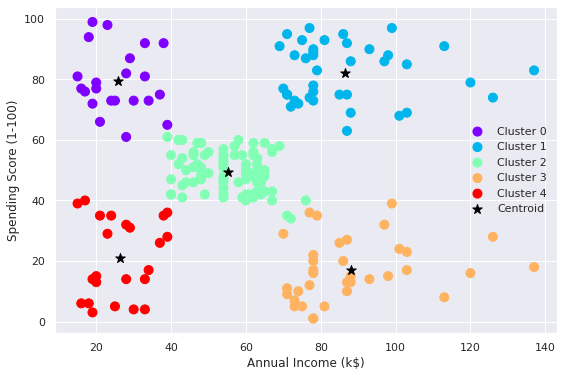

In [305]:
# That's the final plot with K=5 and its centroids for the second cluster
#Annual Income x Spending Score
plt.figure(figsize=(9, 6))
size = 81
cmap = plt.cm.rainbow
norm = plt.Normalize(df["cluster2"].values.min(), df["cluster2"].values.max())

for i, dff in df.groupby("cluster2"):
  plt.scatter(dff["Annual Income (k$)"], dff["Spending Score (1-100)"], s=size, c=cmap(norm(dff['cluster2'])),
              edgecolors=None, label="Cluster {:g}".format(i))
plt.scatter(km_final.cluster_centers_[:,0], km_final.cluster_centers_[:,1], s=99, c="black", marker="*", label="Centroid")  
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)");
plt.legend()
plt.show()

In [330]:
algorithm = (KMeans(n_clusters = 5))
algorithm.fit(X2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [331]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()]) 

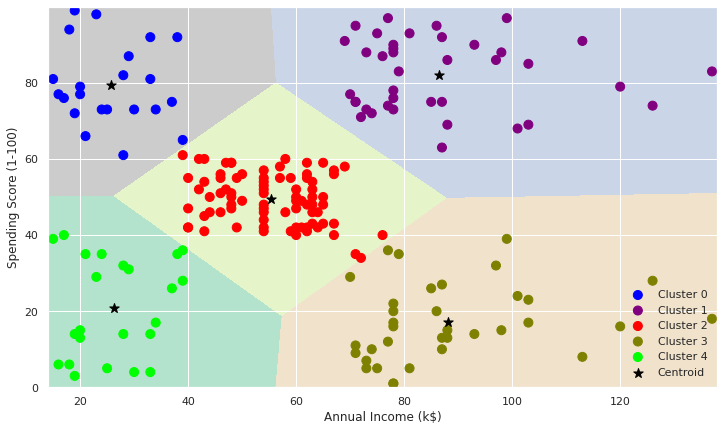

In [336]:
plt.figure(1 , figsize = (12 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest', 
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

cmap = plt.cm.brg
norm = plt.Normalize(df["cluster2"].values.min(), df["cluster2"].values.max())
for i, dff in df.groupby("cluster2"):
  plt.scatter(dff["Annual Income (k$)"], dff["Spending Score (1-100)"], s=size, c=cmap(norm(dff['cluster2'])),
              edgecolors=None, label="Cluster {:g}".format(i))
plt.scatter(km_final.cluster_centers_[:,0], km_final.cluster_centers_[:,1], s=99, c="black", marker="*", label="Centroid")  
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)");
plt.legend()
plt.show()
